#### Módulos externos que serão usados:

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, metrics
import matplotlib.pyplot as plt

#### Lista de DataFrames dos indices após o download:

In [2]:
from data import data

#### Modulos internos que  serão usadas:

In [3]:
from analyze import analyze
from plots import scatter, trend, lmh, trend_years, comparison_filter

#### Apresentação do analyze para obter o DataFrame por ano, indice ou pais, respectivamente:

In [4]:
analyze(data, 2017)

,GDP per capita (current US$),GDP per capita growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)",Food production index (2004-2006 = 100),Arable land (hectares per person),Surface area (sq. km),Rural population (% of total population),Access to electricity (% of population),CO2 emissions (metric tons per capita),Urban population,...,Real interest rate (%),"Stocks traded, total value (% of GDP)","Listed domestic companies, total",Domestic credit to private sector (% of GDP),Bank capital to assets ratio (%),"Official exchange rate (LCU per US$, period average)",Time required to start a business (days),New businesses registered (number),Total tax rate (% of commercial profits),Economic freedom
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,585.850064,0.071666,NaN,NaN,NaN,652860.0,74.750000,NaN,NaN,8.971345e+06,...,NaN,NaN,NaN,3.474263,11.554978,68.026904,7.500000,NaN,71.400000,51.300000
Albania,4537.862492,3.936913,18.961950,NaN,NaN,28750.0,40.617000,NaN,NaN,1.706345e+06,...,NaN,NaN,NaN,35.003810,10.167439,119.099667,5.000000,NaN,37.300000,64.500000
Algeria,4123.389937,-0.052730,12.264896,NaN,NaN,2381740.0,27.948000,NaN,NaN,2.977055e+07,...,1.123428,NaN,NaN,24.363741,NaN,110.973017,20.000000,NaN,65.600000,44.700000
American Samoa,NaN,NaN,NaN,NaN,NaN,200.0,12.830000,NaN,NaN,4.850200e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.500000
Andorra,39146.548836,2.291464,NaN,NaN,NaN,470.0,11.850000,NaN,NaN,6.784500e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,4170.312280,-2.561034,NaN,NaN,NaN,1246700.0,35.161000,NaN,NaN,1.931177e+07,...,-11.683023,NaN,NaN,15.789916,NaN,165.915951,36.000000,NaN,49.100000,48.600000
Antigua and Barbuda,15021.738183,2.274424,1.630647,NaN,NaN,440.0,75.287000,NaN,NaN,2.521000e+04,...,7.631749,NaN,NaN,44.297566,NaN,2.700000,22.000000,NaN,41.900000,53.600000
Argentina,14401.974855,1.879661,5.607975,NaN,NaN,2780400.0,8.251000,NaN,NaN,4.061824e+07,...,4.699532,1.034015,96.0,16.112258,12.281262,16.562707,24.000000,NaN,106.000000,52.300000
Armenia,3936.798320,7.293324,14.937978,NaN,NaN,29740.0,36.897000,NaN,NaN,1.849202e+06,...,11.908686,NaN,NaN,51.501786,15.707337,482.716394,4.500000,NaN,18.500000,68.700000


In [5]:
analyze(data, "Economic freedom")

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.885716,NaN,51.300000
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.892240,65.650034,64.353003,65.920000,64.500000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.843830,48.881858,46.528581,50.060000,44.700000
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,61.105173,61.870661,58.355241,63.540000,61.500000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.703602,47.885804,48.515521,48.940000,48.600000
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48.820404,53.302066,55.383158,56.710000,53.600000
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.553346,44.138922,50.409088,43.770000,52.300000
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.861097,67.125092,70.306017,66.960000,68.700000


In [6]:
analyze(data, "c-World")

,GDP per capita (current US$),GDP per capita growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)",Food production index (2004-2006 = 100),Arable land (hectares per person),Surface area (sq. km),Rural population (% of total population),Access to electricity (% of population),CO2 emissions (metric tons per capita),Urban population,...,Real interest rate (%),"Stocks traded, total value (% of GDP)","Listed domestic companies, total",Domestic credit to private sector (% of GDP),Bank capital to assets ratio (%),"Official exchange rate (LCU per US$, period average)",Time required to start a business (days),New businesses registered (number),Total tax rate (% of commercial profits),Economic freedom
1963,514.702,3.06407,NaN,33.7803,0.362005,1.34043e+08,65.0404,NaN,3.2445,1.11548e+09,...,NaN,NaN,NaN,58.7631,NaN,NaN,NaN,NaN,NaN,NaN
1964,552.503,4.52216,NaN,34.5847,0.356193,1.34043e+08,64.6475,NaN,3.3606,1.15122e+09,...,NaN,NaN,NaN,60.0715,NaN,NaN,NaN,NaN,NaN,NaN
1965,589.749,3.44137,NaN,35.3827,0.350939,1.34043e+08,64.4269,NaN,3.4391,1.18226e+09,...,NaN,NaN,NaN,62.0388,NaN,NaN,NaN,NaN,NaN,NaN
1966,626.618,3.60356,NaN,36.3007,0.343677,1.34043e+08,64.2304,NaN,3.53762,1.2139e+09,...,NaN,NaN,NaN,61.6363,NaN,NaN,NaN,NaN,NaN,NaN
1967,653.255,2.32514,NaN,37.8144,0.338107,1.34043e+08,64.0222,NaN,3.57599,1.24611e+09,...,NaN,NaN,NaN,64.1807,NaN,NaN,NaN,NaN,NaN,NaN
1968,690.673,4.08637,NaN,38.7234,0.334363,1.34043e+08,63.8246,NaN,3.682,1.27851e+09,...,NaN,NaN,NaN,65.1961,NaN,NaN,NaN,NaN,NaN,NaN
1969,744.871,3.94876,NaN,39.1058,0.332102,1.34043e+08,63.62,NaN,3.82173,1.31295e+09,...,NaN,NaN,NaN,64.8192,NaN,NaN,NaN,NaN,NaN,NaN
1970,802.275,2.71175,NaN,40.2928,0.324387,1.34043e+08,63.4308,NaN,4.01242,1.3474e+09,...,NaN,NaN,NaN,67.7127,NaN,NaN,NaN,NaN,NaN,NaN
1971,868.062,2.18271,NaN,41.4163,0.31659,1.34043e+08,63.2469,NaN,4.07164,1.3827e+09,...,NaN,NaN,NaN,71.2431,NaN,NaN,NaN,NaN,NaN,NaN
1972,981.136,3.65896,NaN,41.4397,0.309574,1.34043e+08,63.0362,NaN,4.15523,1.41903e+09,...,NaN,NaN,NaN,76.4137,NaN,NaN,NaN,NaN,NaN,NaN


#### Gerarndo o gráfico de dispersão e a linha de tendencia do log dos indices em determinado ano:

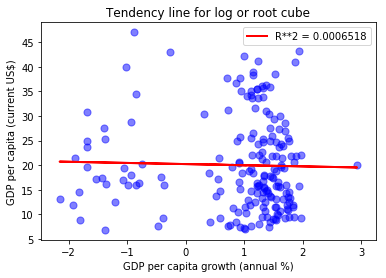

In [7]:
scatter(data, 2017, ['GDP per capita growth (annual %)', 'GDP per capita (current US$)'])

#### Gráfico de barras de um indice em determinado ano dos paises com x menores, medianos e maiores valores:

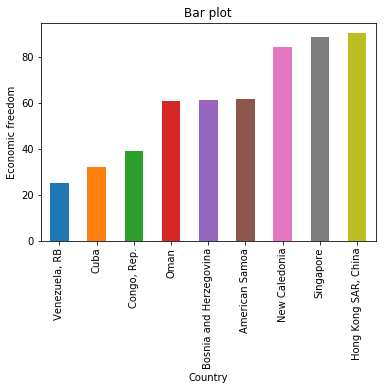

In [8]:
lmh(data, 2017, 'Economic freedom', 3)

#### Gerarndo os gráficos de tendencia dos paises dados em determinado indice e período de tempo:

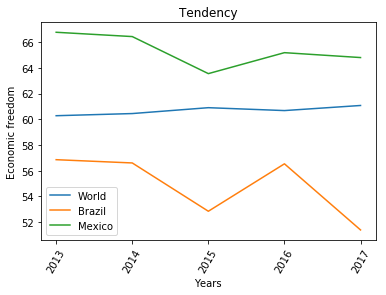

In [9]:
trend(data, ["World", "Brazil", "Mexico"], 'Economic freedom', [1990, 2017])

#### Gráficos de tendencia com valores normalizados de um país e período de tempo para um indice com linha de tendencia ou múltiplos indices:

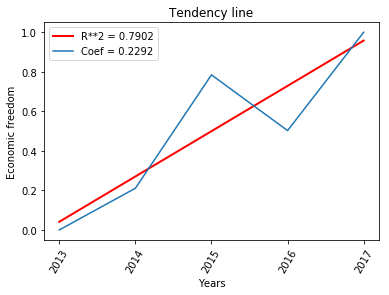

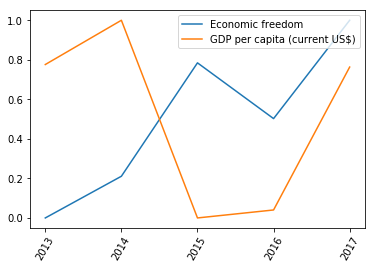

In [10]:
trend_years(data, "World", 'Economic freedom', [2000, 2017])
trend_years(data, "World", ['Economic freedom', 'GDP per capita (current US$)'], [2000, 2017]) 

#### Encontrando os indices com fortes relações em critérios definidos:  

GDP per capita (current US$) and Access to electricity (% of population)


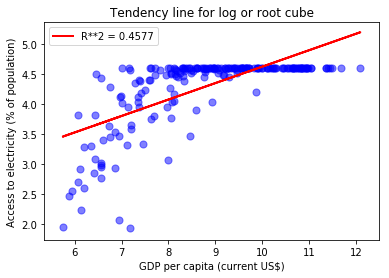

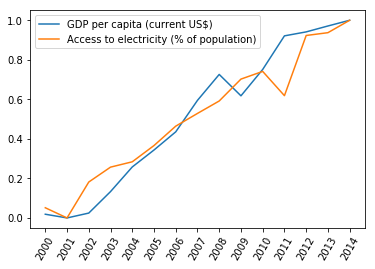

GDP per capita (current US$) and CO2 emissions (metric tons per capita)


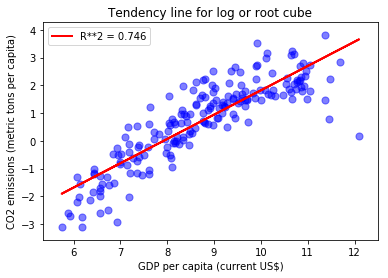

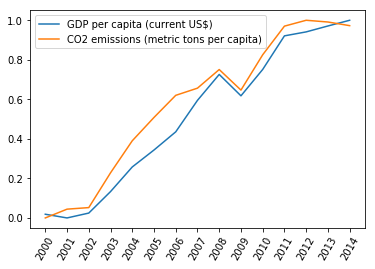

GDP per capita (current US$) and Electric power consumption (kWh per capita)


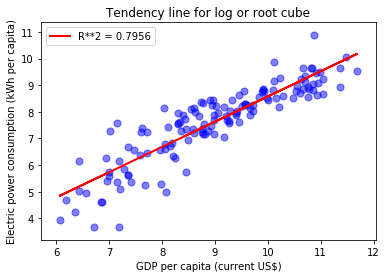

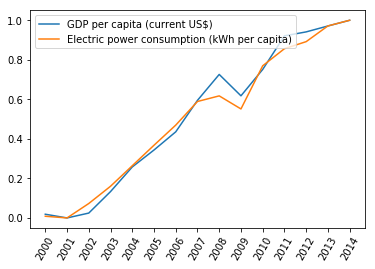

In [11]:
comparison_filter(data, year=2014, years=[2000,2014], country="World", index='GDP per capita (current US$)', r2=0.45, coef=0.05, num=20)